<a href="https://colab.research.google.com/github/Kirara-H/PromotionskollegModule6800_2025/blob/master/6800_Day2_Kirara_Homma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 2: Code used during lecture and lab assignment

## Instructions

- The notebook combines 'code used during lecture' with the 'Day 2 lab' assignment (see further down)
- The lab assignment can be done largely by copying/paste/modification of the code used during the lecture
- Please add answers/discussion/comments to the notebook as comments or text box. Do not create another file in addition.
- When you are done with your assignment, save the notebook in drive and add your last name to the name of the file.
- To hand in the final notebook follow the instructions provided by email



# **Code used during lecture**
## Part One: Tree based methods

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import tree
import os

In [2]:
# Set the numpy random seed
np.random.seed(100)

In [3]:
# run this cell only once if you don't have wget installed
# its assumed you are using windows and have python installed
# only needed if you are running the notebook locally
# %pip install wget
#if not os.path.isfile('brazil_all_data_v2.gz'):
#    !python -m wget  https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz
# Download data only once and make sure it is in the same folder as the notebook

# check if brazil_all_data_v2.gz is available in the current folder and if not, download it

if not os.path.isfile('brazil_all_data_v2.gz'):
    !wget  https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz


--2025-08-19 08:32:05--  https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz
Resolving ilr-ml.s3.eu-central-1.amazonaws.com (ilr-ml.s3.eu-central-1.amazonaws.com)... 52.219.46.145, 52.219.170.26, 3.5.136.196, ...
Connecting to ilr-ml.s3.eu-central-1.amazonaws.com (ilr-ml.s3.eu-central-1.amazonaws.com)|52.219.46.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 283350352 (270M) [application/x-gzip]
Saving to: ‘brazil_all_data_v2.gz’

brazil_all_data_v2. 100%[===================>] 270.22M  88.5MB/s    in 3.1s    

2025-08-19 08:32:08 (88.5 MB/s) - ‘brazil_all_data_v2.gz’ saved [283350352/283350352]



In [4]:
# Load data with pandas into a dataframe
df = pd.read_parquet('brazil_all_data_v2.gz')

In [5]:
# Define binary variable for deforestration in 2018
df['D_defor_2018'] = df['defor_2018']>0
Y_all = df['D_defor_2018']

In [6]:
# Define a list of features names (explantory variables)
lstX = [
  'wdpa_2017',
  'population_2015',
  'chirps_2017',
  'defor_2017',
  'maize',
  'soy',
  'sugarcane',
  'perc_treecover',
  'perm_water',
  'travel_min',
  'cropland',
  'mean_elev',
  'sd_elev',
  'near_road',
  'defor_2017_lag_1st_order',
  'wdpa_2017_lag_1st_order',
  'chirps_2017_lag_1st_order',
  'population_2015_lag_1st_order',
  'maize_lag_1st_order',
  'soy_lag_1st_order',
  'sugarcane_lag_1st_order',
  'perc_treecover_lag_1st_order',
  'perm_water_lag_1st_order',
  'travel_min_lag_1st_order',
  'cropland_lag_1st_order',
  'mean_elev_lag_1st_order',
  'sd_elev_lag_1st_order',
  'near_road_lag_1st_order',
 ]

# Get the explanatory Variables
X_all =  df.loc[:,lstX]

In [7]:
# Split the data into train and test data using sklearn train_test_split object
#   (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#   Note: This randomly split the data in 80% train and 20% test data
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)

In [8]:
# Scale data to 0-1 range using sklearn MinMaxScalar object
# (see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
scaler = MinMaxScaler()
# Use only the train data to fit the MinMaxScalar
scaler.fit(X_train_raw)

# Apply the MinMax transformation to the train and test data
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
# Note the depended variable does not need to be scaled as it is a binary variable anyway

Run logit on deforestation binary variable

In [9]:
# Fit a logistic regression model using sklearn
# (see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

# Create the model object
modelLg = LogisticRegression(random_state=0,penalty=None,fit_intercept=True,max_iter=1000)
# Fit the model using the training data
modelLg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, penalty=None, random_state=0)

In [10]:
# Define a function that prints the model statistics.
# We will use the function below to always get the same model stats for each of
# the models the we will estimate below.
def printOutput(mod,X_train,Y_train,X_test,Y_test):
  # view results
  print('Score in train', mod.score(X_train, Y_train))
  print('Score in test', mod.score(X_test, Y_test))

  Y_test_had_Tree = mod.predict(X_test)

  print('\nConfusion Matrix')
  print(pd.DataFrame(confusion_matrix(Y_test, Y_test_had_Tree),
            index=pd.MultiIndex.from_arrays([['actual','actual'], ['False','True']]),
            columns=pd.MultiIndex.from_arrays([['predicted','predicted'], ['False','True']])))

In [11]:
# Use the function to print the model statistics for our logit model
printOutput(modelLg,X_train,Y_train,X_test,Y_test)

# Compute ROC curve and ROC area for each class

# Get the predicted probabiltities
Y_score = modelLg.decision_function(X_test)

# Get true positive and false positive rate
# See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
fpr_Lg, tpr_Lg, _ = roc_curve(Y_test, Y_score)

# Get the Area under the cureve (AUC)
# See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
roc_auc_Lg = auc(fpr_Lg, tpr_Lg)

print('\nROC AUC', roc_auc_Lg)

Score in train 0.7860636552772665
Score in test 0.7838081139473474

Confusion Matrix
             predicted      
                 False  True
actual False     36626  1313
       True       9494  2555

ROC AUC 0.7653510262599644


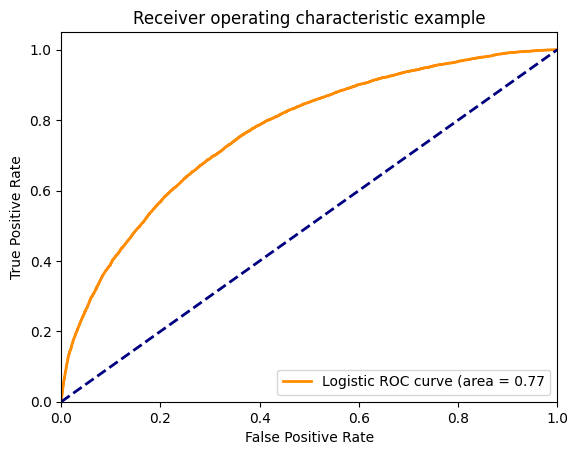

In [12]:
# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr_Lg, tpr_Lg, color='darkorange',
         lw=lw, label='Logistic ROC curve (area = %0.2f' % roc_auc_Lg)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Now run a decision tree using the same specification

In [13]:
# Fit a decision tree using sklearn
# (see https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

# Define a model object
modelTree = tree.DecisionTreeClassifier()
# Fit the model
modelTree = modelTree.fit(X_train, Y_train)

In [14]:
# Use the function to print the model statistics for our tree model
printOutput(modelTree,X_train,Y_train,X_test,Y_test)

Score in train 1.0
Score in test 0.7628630871409138

Confusion Matrix
             predicted      
                 False  True
actual False     31896  6043
       True       5811  6238


Run the same model using  a random forest

In [15]:
# run a random forest using sklearn and default hyperparameters (note, this will take a few minutes)
# (see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
from sklearn.ensemble import RandomForestClassifier

# Create model object
# Note: We reduce the number of estimators here to speed-up runtime,
#       default value for n_estimators is 100
modelForest = RandomForestClassifier(n_estimators=20)
# Fit model
modelForest = modelForest.fit(X_train, Y_train)

In [16]:
# Print model output stats
printOutput(modelForest,X_train,Y_train,X_test,Y_test)


Score in train 0.9958340001600384
Score in test 0.827618628470833

Confusion Matrix
             predicted      
                 False  True
actual False     35511  2428
       True       6189  5860


In [ ]:
# ====================
# Discuss in the group
# ====================
# What do you conclude from the model outcome. Is this a
# useful model. Compare the results to the logit outcomes.

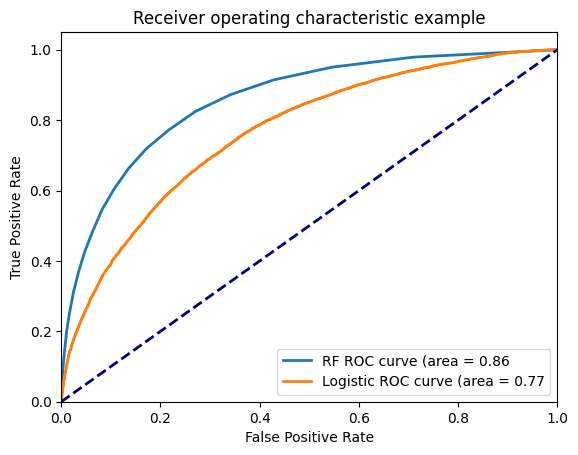

In [17]:
# Plot ROC curve
# Get the predicted probabiltities
Y_scoreRF = modelForest.predict_proba(X_test)[:,1]

# Get true positive and false positive rate
fpr_RF, tpr_RF, _ = roc_curve(Y_test, Y_scoreRF)

# Get the Area under the cureve (AUC)
roc_auc_RF = auc(fpr_RF, tpr_RF)


plt.figure()
lw = 2
plt.plot(fpr_RF, tpr_RF,
         lw=lw, label='RF ROC curve (area = %0.2f' % roc_auc_RF)
plt.plot(fpr_Lg, tpr_Lg,
         lw=lw, label='Logistic ROC curve (area = %0.2f' % roc_auc_Lg)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Visualizing the results

Feature ranking:
1. wdpa_2017 (0.168369)
2. population_2015 (0.061447)
3. chirps_2017 (0.046647)
4. defor_2017 (0.041990)
5. maize (0.040608)
6. soy (0.038254)
7. sugarcane (0.038150)
8. perc_treecover (0.037677)
9. perm_water (0.035631)
10. travel_min (0.033954)
11. cropland (0.033635)
12. mean_elev (0.032990)
13. sd_elev (0.032302)
14. near_road (0.032109)
15. defor_2017_lag_1st_order (0.032097)
16. wdpa_2017_lag_1st_order (0.030819)
17. chirps_2017_lag_1st_order (0.029469)
18. population_2015_lag_1st_order (0.029112)
19. maize_lag_1st_order (0.029078)
20. soy_lag_1st_order (0.028244)
21. sugarcane_lag_1st_order (0.025495)
22. perc_treecover_lag_1st_order (0.024320)
23. perm_water_lag_1st_order (0.023447)
24. travel_min_lag_1st_order (0.023365)
25. cropland_lag_1st_order (0.020919)
26. mean_elev_lag_1st_order (0.015527)
27. sd_elev_lag_1st_order (0.007596)
28. near_road_lag_1st_order (0.006748)


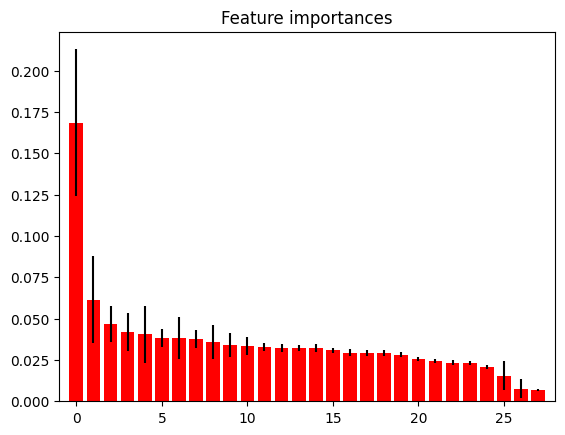

In [18]:
# Generate a feature importance graph for the forest
# Adjusted based on  https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = modelForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, lstX[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Part Two: SHAP values

In [19]:
# First install the SHAP libary
!pip install -q shap

In [20]:
# Import the shape libary
import shap
# Load JS visualization code to notebook
shap.initjs()

In [21]:
# Create a dataframe for our train data that includes the variable names
df_X_train = pd.DataFrame(X_train,columns=lstX)

# Explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(modelForest)

In [22]:
df_X_train_subsample = shap.sample(df_X_train, 100)

In [23]:
# Calculate the shape values using the TreeExplainer object
shap_values = explainer.shap_values(df_X_train_subsample)

In [24]:
# Get predicted probabilities to compare shape values
# Y_train_proba = modelTree.predict_proba(df_X_train_subsample)
Y_train_proba = modelForest.predict_proba(df_X_train_subsample)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [25]:
# Inspect shape of SHAP values
shap_values.shape


(100, 28, 2)

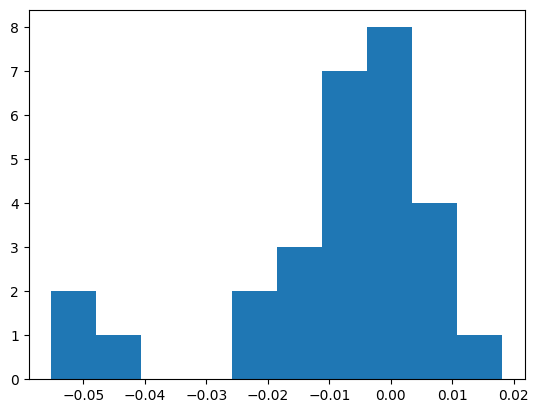

In [26]:
plt.hist(shap_values[lstX.index('defor_2017'),:,1]);

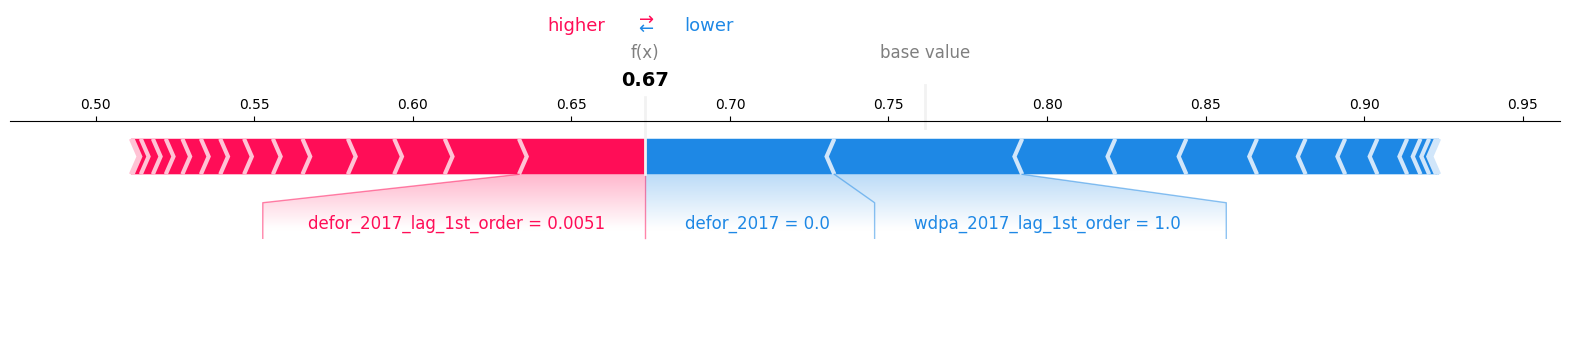

In [27]:
# visualize the first prediction's explanation
# shap.force_plot(explainer.expected_value, shap_values[0,:], df_X_train.iloc[0,:])
iobs = 0
# If you have a javascript error use matplotlib=True to avoid Javascript
shap.force_plot(explainer.expected_value[0], shap_values[iobs,:,1],
                np.round(df_X_train_subsample.iloc[iobs,:],4),matplotlib=True,
                contribution_threshold=0.1)
# Note: This might look different than the version the slides because another random seed
#       was used to create the plots in the slides

In [28]:
# Explore shape values manually
shap_iobs = explainer.expected_value + shap_values[iobs,:].sum()
print(f'SHAP value of obs {iobs}:',shap_iobs)
print('SHAP value for base:', explainer.expected_value)

# SHAP value are in log-odds, transform to probability
print('Expected Prob:',np.exp(explainer.expected_value) / (1 + np.exp(explainer.expected_value)))
print(f'Prob of obs {iobs}:',np.exp(shap_iobs) / (1 + np.exp(shap_iobs)))

# compare to predicted proability
print(f'Proba of obs {iobs}:', Y_train_proba[iobs][1])

SHAP value of obs 0: [0.76157253 0.23842747]
SHAP value for base: [0.76157253 0.23842747]
Expected Prob: [0.68169505 0.55932609]
Prob of obs 0: [0.68169505 0.55932609]
Proba of obs 0: 0.15


In [29]:
# To reproduce the plot in the lecture use a larger subsample size
# Note, that computation takes longer the larger the subsample size
# df_X_train_subsample = shap.sample(df_X_train, 1000)
# shap_values = explainer.shap_values(df_X_train_subsample)

/tmp/ipython-input-3127516843.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:,:,1], df_X_train_subsample)


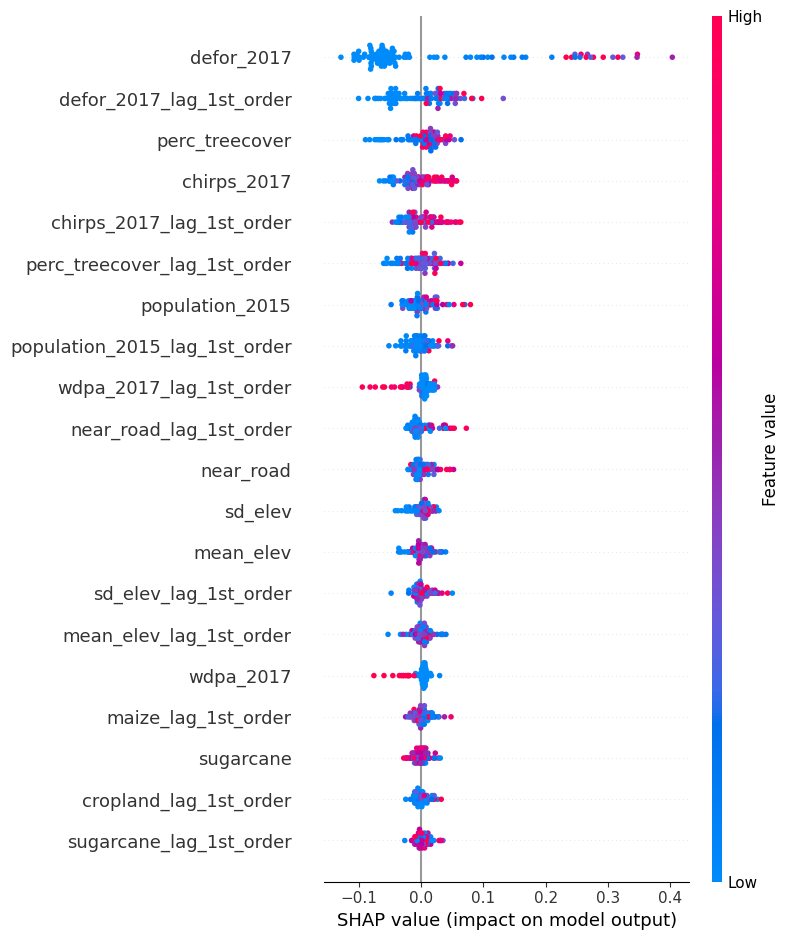

In [30]:
# summarize the effects of all the features (heterogeneity is shown)
  # show the direction of the effect (if points scatter evenly, there is not clear trend)
shap.summary_plot(shap_values[:,:,1], df_X_train_subsample)

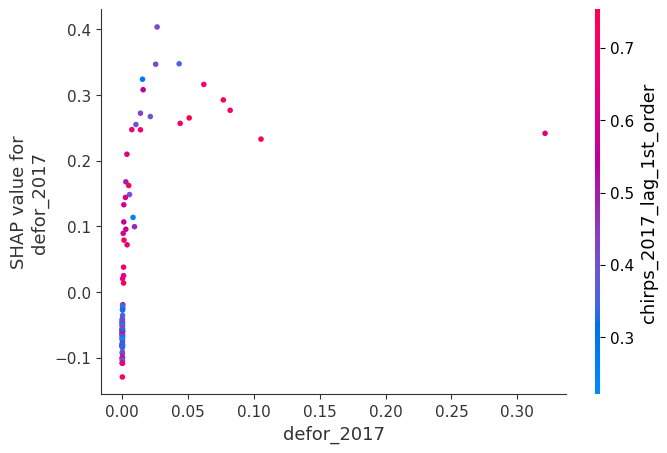

In [31]:
# create a dependence plot to show the effect of a single feature across the whole dataset
  # we can repeat this with diff variables
shap.dependence_plot("defor_2017", shap_values[:,:,1], df_X_train_subsample)

# **Lab**
## Part One: Tree based methods

The lab today will have you predict deforestation using both a random forest and XGboost models

In [33]:
# In the lecture part we have run a Random Forest that heavily
# overfitted the training data. Adjust a hyperparamter
# and see if you can train a model that does not overfit.

# Hint: Vary the parameter max_depth or min_samples_split

# Sklearn documentation on RF:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba

# ==============
# Your code here
# ==============
from sklearn.ensemble import RandomForestClassifier

# Define a model object
modelForest = RandomForestClassifier(n_estimators=20, min_samples_split= 10,
                                     max_depth=5)

# Fit model
modelForest = modelForest.fit(X_train, Y_train)

#  Print model stats output
printOutput(modelForest, X_train, Y_train, X_test, Y_test)

Score in train 0.8147155317276146
Score in test 0.8113747299351844

Confusion Matrix
             predicted      
                 False  True
actual False     35950  1989
       True       7440  4609


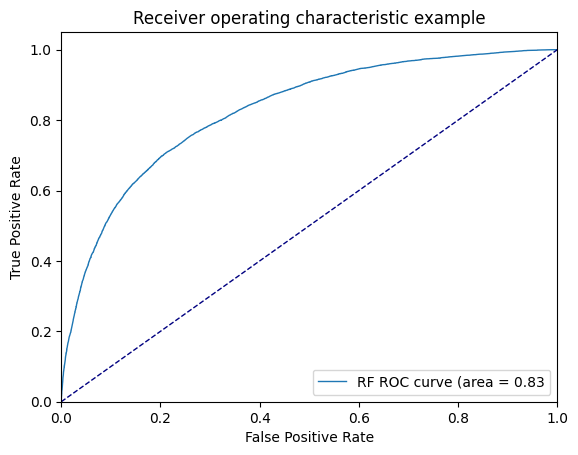

In [35]:
# Plot ROC curve
# Get the predicted probabiltities
Y_scoreRF = modelForest.predict_proba(X_test)[:,1]

# Get true positive and false positive rate
fpr_RF, tpr_RF, _ = roc_curve(Y_test, Y_scoreRF)

# Get the Area under the cureve (AUC)
roc_auc_RF = auc(fpr_RF, tpr_RF)


plt.figure()
lw = 1
plt.plot(fpr_RF, tpr_RF,
         lw=lw, label='RF ROC curve (area = %0.2f' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [37]:
# Now run an XGBoost model for the same task
import xgboost as xgb

# Hint: 1) Look at one of the tutorial on XGB on how to specify and run the model
#          (e.g. https://hackernoon.com/want-a-complete-guide-for-xgboost-model-in-python-using-scikit-learn-sc11f31bq)
#       2) You do not need to adjust hypterparamter here. The default paramters
#          should be fine here.

# ==============
# Your code here
# ==============
# Specify model
model_xgb = xgb.XGBClassifier()

# Fit model to data
model_xgb.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [43]:
# Print the model stats of you XGB model using the function from above
# ==============
# Your code here
# ==============
printOutput(model_xgb, X_train, Y_train, X_test, Y_test)

# accuracy rate
model_xgb.score(X_test,Y_test)
print("Accuracy:", model_xgb.score(X_test, Y_test))


Score in train 0.8460580539329439
Score in test 0.825378090741778

Confusion Matrix
             predicted      
                 False  True
actual False     35353  2586
       True       6143  5906
Accuracy: 0.825378090741778


In [42]:
# Compare to the outcome of the other model
# (not need to change anything here)
print('\n--- Logistic')
printOutput(modelLg,X_train,Y_train,X_test,Y_test)

print('\n--- Tree')
printOutput(modelTree,X_train,Y_train,X_test,Y_test)

print('\n--- Forest')
printOutput(modelForest,X_train,Y_train,X_test,Y_test)



--- Logistic
Score in train 0.7860636552772665
Score in test 0.7838081139473474

Confusion Matrix
             predicted      
                 False  True
actual False     36626  1313
       True       9494  2555

--- Tree
Score in train 1.0
Score in test 0.7628630871409138

Confusion Matrix
             predicted      
                 False  True
actual False     31896  6043
       True       5811  6238

--- Forest
Score in train 0.8147155317276146
Score in test 0.8113747299351844

Confusion Matrix
             predicted      
                 False  True
actual False     35950  1989
       True       7440  4609


In [ ]:
# Write a couple of sentences on what you see in your models, which you
# believe are performing better and why
# ================
# Your answer here
# ================
# The best model is random forest, because the accuracy rate for test dataset is the highest.
# The accuracy rate for train data set is the highest in a simple decision tree classifier (modelTree),
# but the accuracy rate for test data in this model is low, implying a sign of overfitting.


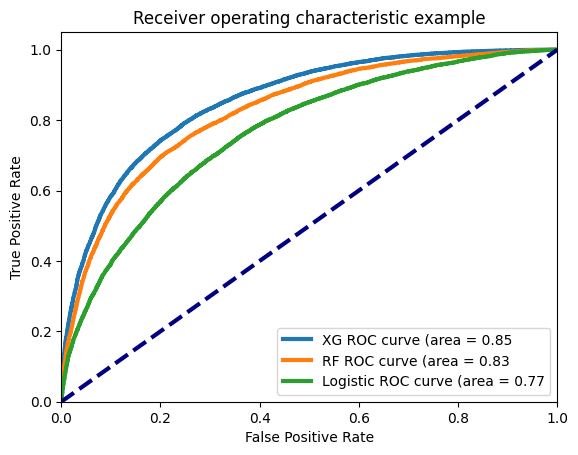

In [47]:
# Plot an ROC corve for the Logit, Random Forest and XGB model

# Hint: Check what we have done above...
# ==============
# Your code here
# ==============
# Get the predicted probabiltities
Y_scoreXG = model_xgb.predict_proba(X_test)[:,1]

# Get true positive and false positive rate
fpr_XG, tpr_XG, _ = roc_curve(Y_test, Y_scoreXG)

# Get the Area under the cureve (AUC)
roc_auc_XG = auc(fpr_XG, tpr_XG)

# plot three AUC
plt.figure()
lw = 3
plt.plot(fpr_XG, tpr_XG,
         lw=lw, label='XG ROC curve (area = %0.2f' % roc_auc_XG)
plt.plot(fpr_RF, tpr_RF,
         lw=lw, label='RF ROC curve (area = %0.2f' % roc_auc_RF)
plt.plot(fpr_Lg, tpr_Lg,
         lw=lw, label='Logistic ROC curve (area = %0.2f' % roc_auc_Lg)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


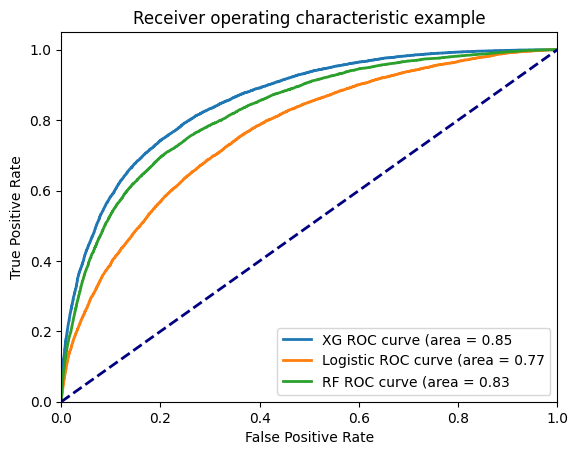

In [48]:
# Plot the figure (not need to change anything here)
plt.figure()
lw = 2

plt.plot(fpr_XG, tpr_XG,
         lw=lw, label='XG ROC curve (area = %0.2f' % roc_auc_XG)

plt.plot(fpr_Lg, tpr_Lg,
         lw=lw, label='Logistic ROC curve (area = %0.2f' % roc_auc_Lg)

plt.plot(fpr_RF, tpr_RF,
         lw=lw, label='RF ROC curve (area = %0.2f' % roc_auc_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# In one or two sentences, discuss what the ROC curves are telling you
# ================
# Your answer here
# ================
# The larger the area under the ROC curve, the better the model accuracy is.
# Thus, in this case, XGB model has the highest accuracy rate, followed by random forest model and then logistic model.


### Optional Tasks

(Optional) Generate your model's prediction errors and explore them - comparing different subsets of your data (e.g. protected areas vs others)

In [66]:
# Predicted labels (0/1)
y_predXG = model_xgb.predict(X_test)

# Get the predicted probabiltities
Y_scoreXG = model_xgb.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss

# Accuracy and error rate
accuracy = accuracy_score(Y_test, y_predXG)
error_rate = 1 - accuracy
print("Accuracy:", accuracy)
print("Error rate:", error_rate)

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_predXG))

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(Y_test, y_predXG))


Accuracy: 0.825378090741778
Error rate: 0.17462190925822196

Confusion Matrix:
 [[35353  2586]
 [ 6143  5906]]

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.93      0.89     37939
        True       0.70      0.49      0.58     12049

    accuracy                           0.83     49988
   macro avg       0.77      0.71      0.73     49988
weighted avg       0.81      0.83      0.81     49988



In [71]:
# Compare different sub-sets: protected area in 2017 or not
# mask for protected areas
idx_wdpa = lstX.index("wdpa_2017")  # column index
mask_prot = X_test[:, idx_wdpa] == 1

# Filter X_test and Y_test
X_test_prot = X_test[mask_prot]
Y_test_prot = Y_test[mask_prot]

# Make predictions
y_predXG_protected = model_xgb.predict(X_test_prot)

# Get the predicted probabiltities
Y_scoreXG_protected = model_xgb.predict_proba(X_test_prot)[:,1]

# Accuracy and error rate
accuracy_prot = accuracy_score(Y_test_prot, y_predXG_protected)
error_rate_prot = 1 - accuracy_prot
print("Accuracy (protected area):", accuracy_prot)
print("Error rate (protected area):", error_rate_prot)

Accuracy (protected area): 0.9069767441860465
Error rate (protected area): 0.09302325581395354


In [72]:
# Filter X_test and Y_test for non-protected area
X_test_non_prot = X_test[~mask_prot]
Y_test_non_prot = Y_test[~mask_prot]

# Make predictions
y_predXG_nonprotected = model_xgb.predict(X_test_non_prot)

# Get the predicted probabiltities
Y_scoreXG_nonprotected = model_xgb.predict_proba(X_test_non_prot)[:,1]

# Accuracy and error rate
accuracy_nonprot = accuracy_score(Y_test_non_prot, y_predXG_nonprotected)
error_rate_nonprot = 1 - accuracy_nonprot
print("Accuracy (non-protected area):", accuracy_nonprot)
print("Error rate (non-protected area):", error_rate_nonprot)

Accuracy (non-protected area): 0.8253078386224847
Error rate (non-protected area): 0.1746921613775153


## Lab Part Two: SHAP Values
The second part focus on SHAP values. First we show you how to plot SHAP values for the XG Boost model, which you have already seen in the lecutre. Then you  should create SHAP values for the logit model and explore how SHAP value would look like in a well known linear model.

More on SHAP values:

https://github.com/slundberg/shap


**First run the code for SHAP values from the Lecture, then continue with this part**

In [ ]:
# ====================
# Discuss in the group
# ====================
# How do you interpret this plot?
# When might you want to use a plot like this?

# This is the result for the first observation. The predicted probability of deforestation in this observation is 0.67.
# The result implies that defor_2017_lag_1st_order increases this probability, while wdpa_2017_lag_1st_order decreases this probability.
# detor_2017 has no contribution (no effect).

# This is useful when we want to compare impacts of factors among specific sub-sample

/tmp/ipython-input-3127516843.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:,:,1], df_X_train_subsample)


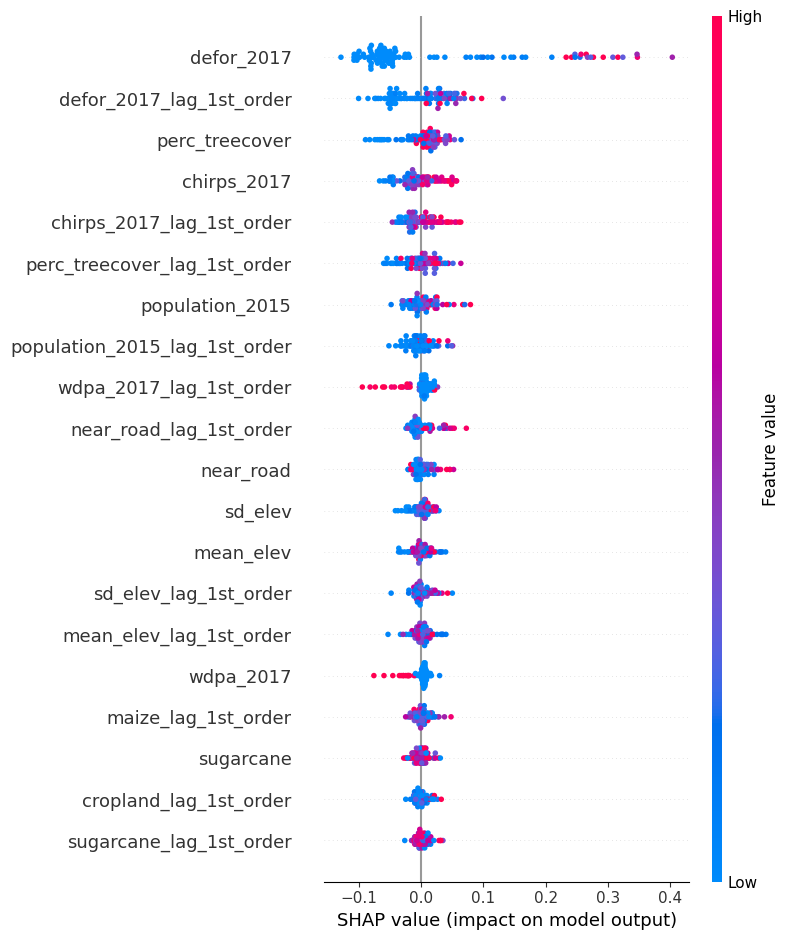

In [49]:
# summarize the effects of all the features
shap.summary_plot(shap_values[:,:,1], df_X_train_subsample)

In [ ]:

# ====================
# Discuss in the group
# ====================
# How do you interpret this plot?

# The variables like defor_2017, defor_2017_lag_1st_order, perc_treecover have larger impacts on deforestation in 2018 (outcome).
# For instance, for defor_2017, the result shows that
# lower deforestation in 2017 leads to lower deforestation probability in 2018 (negative effect), while higher deforestation in 2017 leads to higher deforestation probability in 2018 (positive effect).
# In constrast, variables like travel_min_lag_1st_order do not show the specific patterns in their impacts.

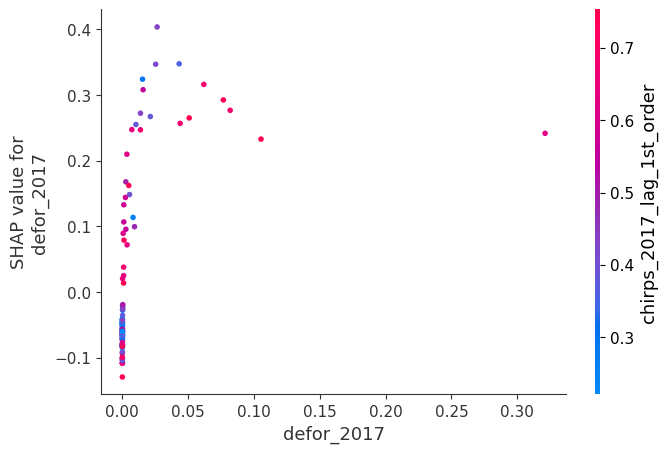

In [50]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("defor_2017", shap_values[:,:,1], df_X_train_subsample)

In [ ]:
# ====================
# Discuss in the group
# ====================
# How do you interpret this plot?

# The plot shows the effect of detor_2017 and how it relates to chirps_2017_lag_1st_order (neighboring plot's precipitation in 2017).
# Sharp values for detor_2017 having 0 value (zero deforestation in 2017) range from -0.1 to 0.4,
# implying that the effect of deforestation in 2017 on deforestation in 2018 can vary, from small to large.
# This suggests that detor_2017 is not a great predictor.

# In addition, we can see that an increase in deforestation in 2017 in places with high nearby precipitation
# is related with that deforestation having a lower effect on deforestation in 2018,
# compared to the pattern in places with low nearby precipitation.

In [ ]:
# ====================
# Discuss in the group
# ====================
# Before you start creating the plots, discuss in the group what kind of
# results you expect for the linear model. Specifically, think about how the
# last plot (the dependence_plot) would look in this case.
# Maybe linear shape?

In [58]:
# Here we use the shap.LinearExplainer() function instead of the
# shap.TreeExplainer(...) we used above

# You can have a look here for a reference:
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html

# ==============
# Your code here
# ==============
df_X_train = pd.DataFrame(X_train,columns=lstX)
df_X_train_subsample = shap.sample(df_X_train, 100) #takes a random sample of 100 rows

# set a masker to define how to “remove” or “hide” a feature in SHAP calculations.
masker = shap.maskers.Independent(df_X_train_subsample)

explainer = shap.LinearExplainer(modelLg, masker=masker)
shap_values = explainer.shap_values(df_X_train_subsample)


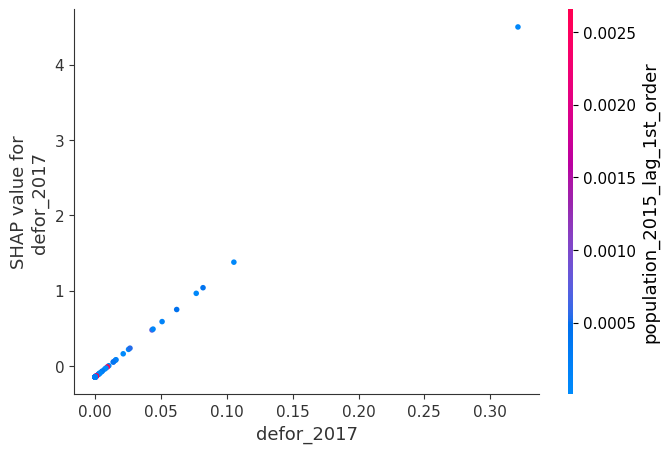

In [56]:
# Now create a dependence plot to show the effect of a single feature
# across the whole dataset, as was done above but now for the logit model

# ==============
# Your code here
# ==============
shap.dependence_plot("defor_2017", shap_values, df_X_train_subsample)

In [ ]:
# ====================
# Discuss in the group
# ====================


# 1) Does this look like to what you expected?
# Yes. In a linear model, the effect is assumed to be constant. Therefore, the plot is also linear.

# 2) How does this compare to the plot for the XGB model. What can you conclude?

# Note: Below you find the usual regression output for logit model again. This
#       might be interesting as a reference.

/tmp/ipython-input-2083295964.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, df_X_train_subsample)


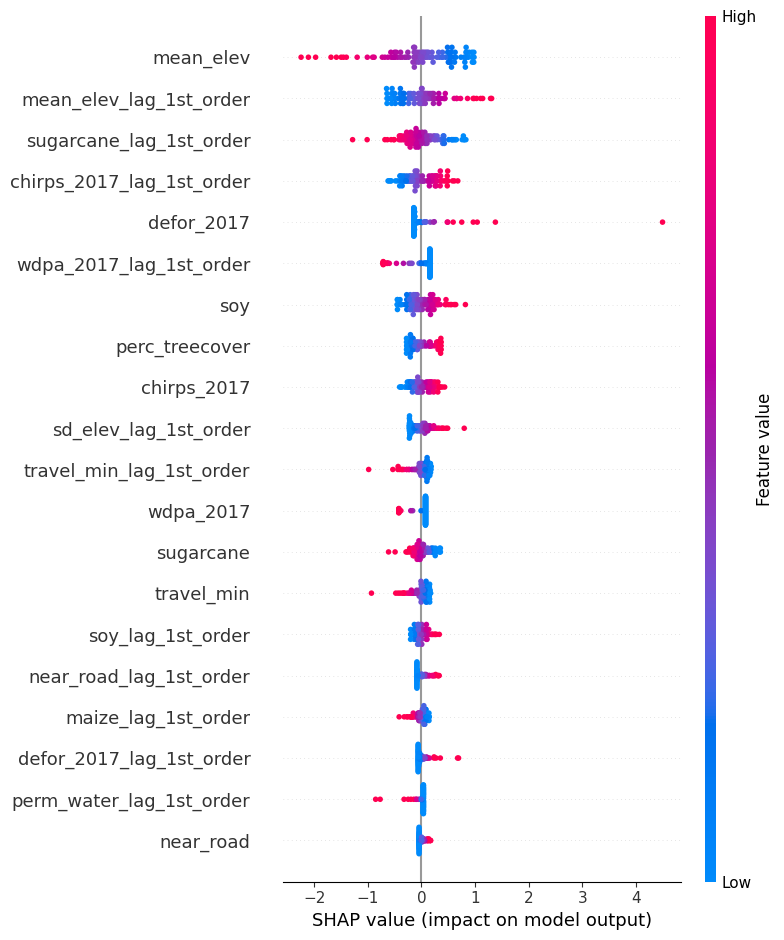

In [59]:

# Have a look at the SHAP summary plot
shap.summary_plot(shap_values, df_X_train_subsample)

## **For your reference**

Lets create our usual regression output for the logit model as a reference

This used the same code from the lab intro session.

(Not need to change/do anything here)

In [60]:
from scipy.stats import norm
# Function to calculate pvalues and standard errors for a scikit-learn logisticRegression
# Source: https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    # m = len(model.coef_[0])
    # coefs = model.coef_[0]
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se
    p = (1 - norm.cdf(abs(t))) * 2
    return se, p

In [61]:
# Use the previously created function to create a regression output table
se, p = logit_pvalue(modelLg, X_train)
coefs = np.concatenate([modelLg.intercept_, modelLg.coef_[0]]).T
resCoef = pd.DataFrame(coefs,index=['constant']+lstX)
resCoef.columns = ['coef']
resCoef['se'] = se
resCoef['pval'] = p
resCoef

,coef,se,pval
constant,-1.956368,0.034316,0.000000e+00
wdpa_2017,-0.497666,0.064117,8.437695e-15
population_2015,0.608598,0.564662,2.811190e-01
chirps_2017,1.161510,0.690678,9.262774e-02
defor_2017,14.452669,0.290113,0.000000e+00
maize,0.447374,0.771138,5.618154e-01
soy,1.499343,0.576452,9.295612e-03
sugarcane,-1.213180,0.507535,1.683290e-02
perc_treecover,0.646104,0.032840,0.000000e+00
perm_water,-0.520798,0.279833,6.272990e-02


### **Optional Tasks**


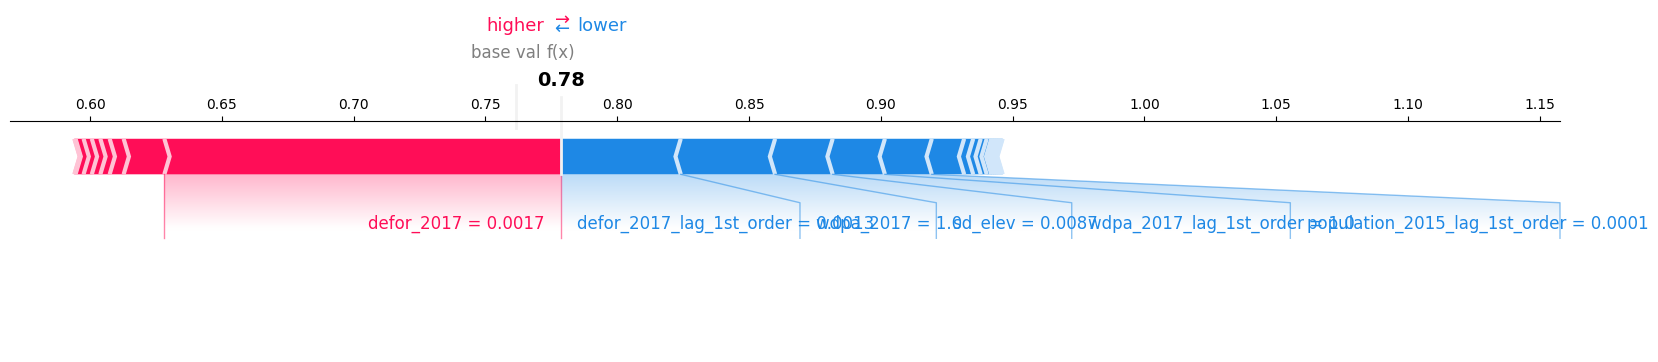

/tmp/ipython-input-1753311665.py:22: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_protected[:,:,1], df_X_train_protected)


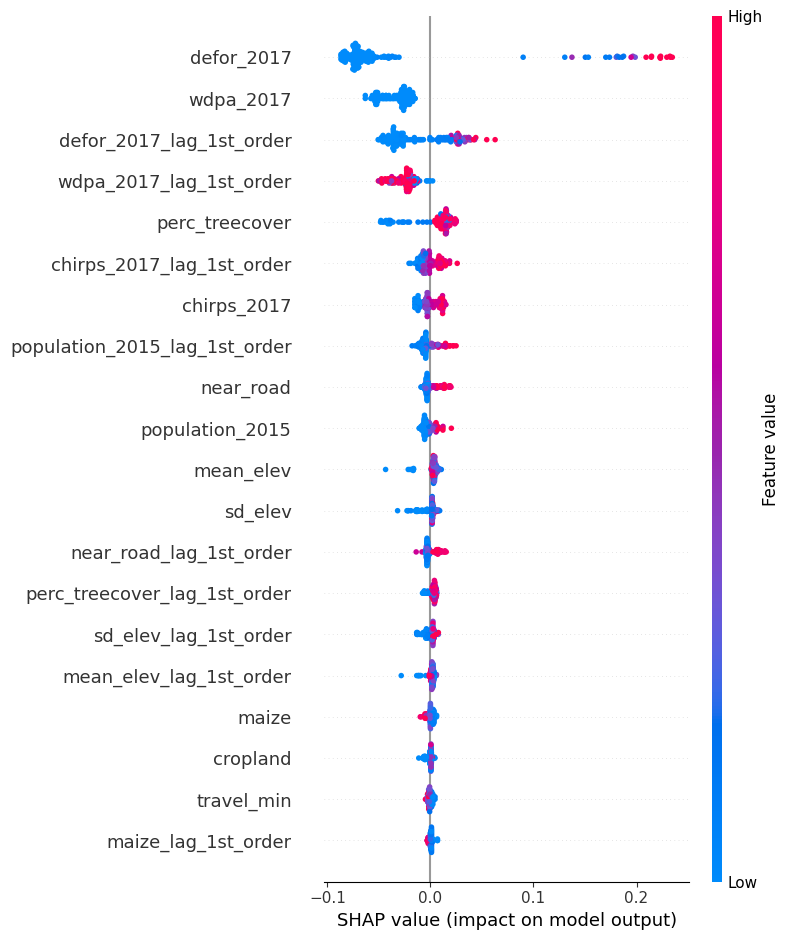

In [64]:
# (Optional-1) Explore the Shapley Value Explanations for different sub-sets of the data (e.g. protected areas versus others)
#  and in a few sentences, discuss your findings
#================
# get sub-set for protected area in 2017
#================
# Explain the model's predictions using SHAP, in random forest model
explainer = shap.TreeExplainer(modelForest)

# Filter all protected-area rows
df_X_train_protected = df_X_train[df_X_train["wdpa_2017"] == 1]

# Get corresponding SHAP values
shap_values_protected = explainer.shap_values(df_X_train_protected)

# visualize the first prediction's explanation
iobs = 0
shap.force_plot(explainer.expected_value[0], shap_values_protected[iobs,:,1],
                np.round(df_X_train_protected.iloc[iobs,:],4),matplotlib=True,
                contribution_threshold=0.1)

# summarize the effects of all the features
shap.summary_plot(shap_values_protected[:,:,1], df_X_train_protected)


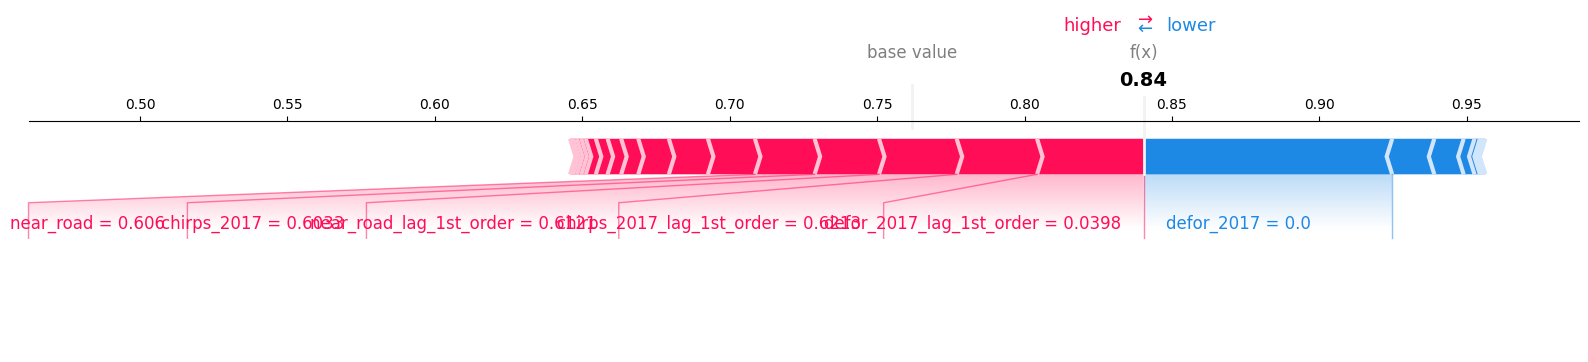

/tmp/ipython-input-2577754140.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_non_protected[:,:,1], df_X_train_non_protected)


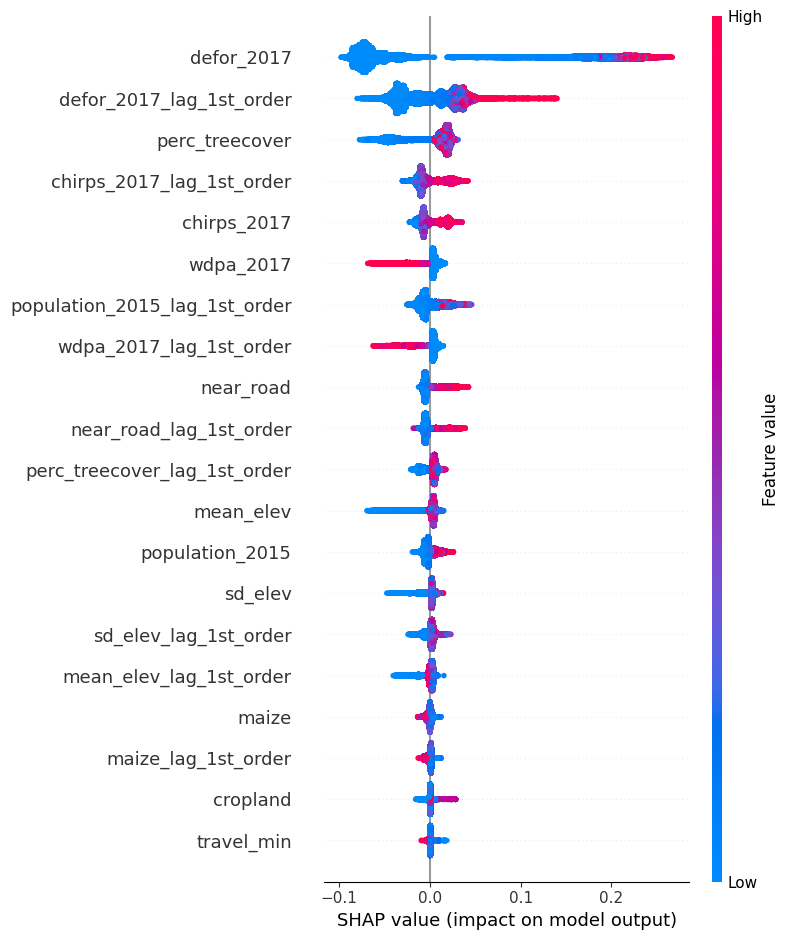

In [65]:
#================
# get sub-set for non-protected area in 2017
#================
# Filter all protected-area rows
df_X_train_non_protected = df_X_train[df_X_train["wdpa_2017"] != 1]

# Get corresponding SHAP values
shap_values_non_protected = explainer.shap_values(df_X_train_non_protected)

# visualize the first prediction's explanation
iobs = 0
shap.force_plot(explainer.expected_value[0], shap_values_non_protected[iobs,:,1],
                np.round(df_X_train_non_protected.iloc[iobs,:],4),matplotlib=True,
                contribution_threshold=0.1)

# summarize the effects of all the features
shap.summary_plot(shap_values_non_protected[:,:,1], df_X_train_non_protected)


In [ ]:
# Compare results
# For instance, for detor_2017, the effect is more outstanding in protected area: higher (lower) rate of deforestation in 2017 leads to higher (lower) probability of deforestation in 2018.
# In contrast, in non-protected area, more observations with low deforestation rate in 2017 exhibit positive effect on deforestation probability in 2018.
#